 # Steel Industry Energy Consumption

Content

This company produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption

 ## 1. Data upload and first study

In [36]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import optuna
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [37]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Steel_Industry_Energy_Consumption/Steel_industry_data.csv')

In [38]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

None

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [39]:
# Check duplicates
df.duplicated().sum()

0

In [40]:
# Check other duplicate
object_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['DateCrawled', 'DateCreated', 'LastSeen']]



for col in object_columns:
    print(df[col].value_counts())
    print()

date
01/01/2018 00:15    1
01/09/2018 08:45    1
01/09/2018 07:15    1
01/09/2018 07:30    1
01/09/2018 07:45    1
                   ..
02/05/2018 14:45    1
02/05/2018 14:30    1
02/05/2018 14:15    1
02/05/2018 14:00    1
31/12/2018 00:00    1
Name: count, Length: 35040, dtype: int64

WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64

Day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64



 ## 2. Analysis of data

In [42]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [43]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type']] # choice all features
num_cols = 2 # Amount of columns
num_rows = (len(df_describe.columns) + num_cols - 1) // num_cols # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

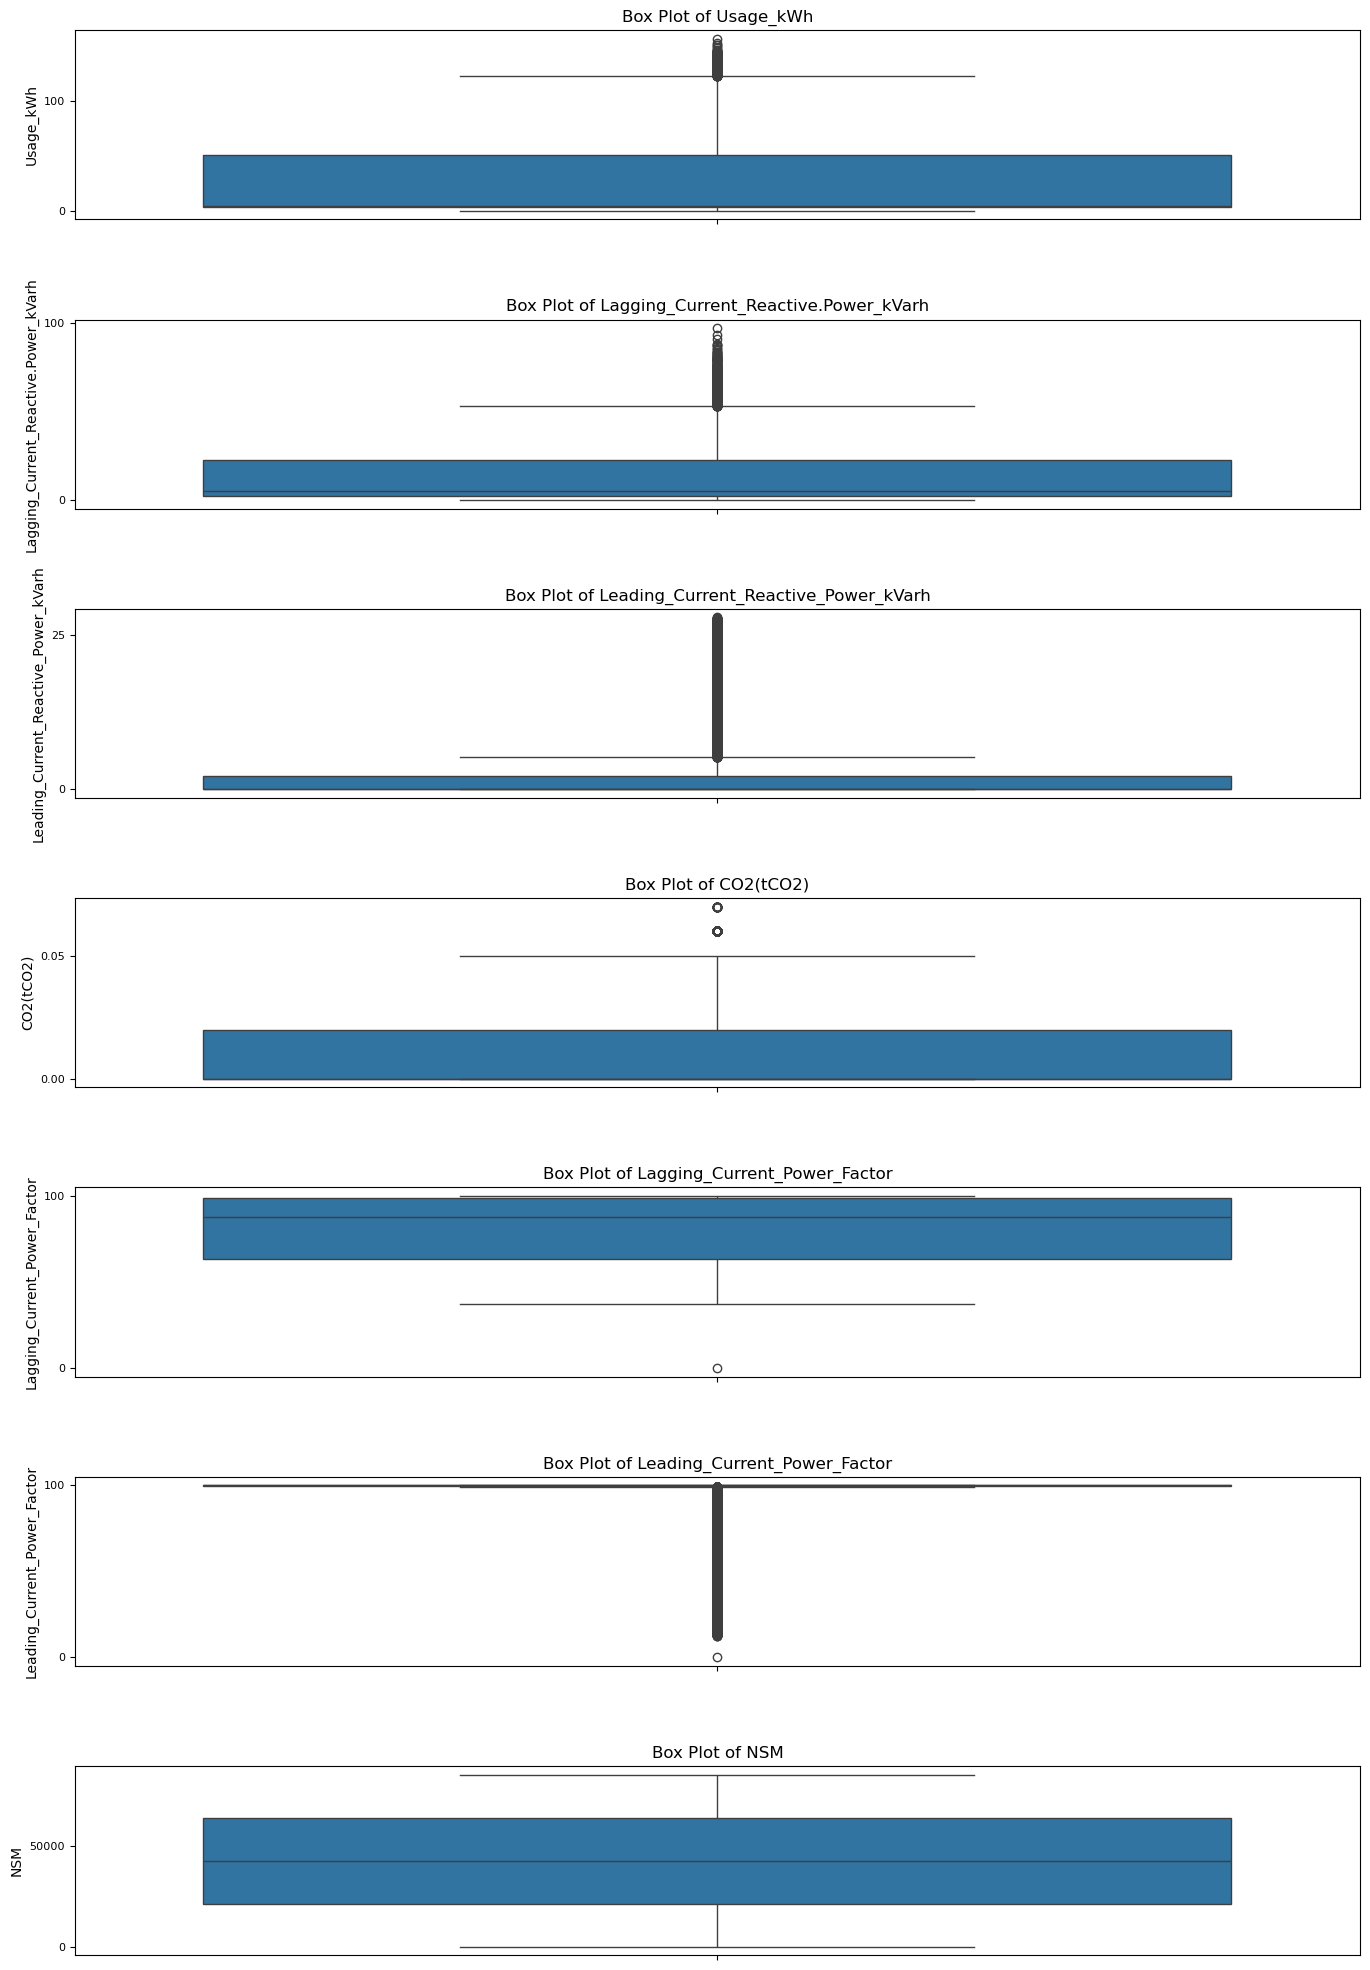

In [45]:
# Создание боксплотов для каждой числовой характеристики
numerical_features = df.select_dtypes(include=['number'])

# Определяем размер фигуры один раз
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Создаем подграфики для каждого числового признака
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Создаем подграфик
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Размер шрифта заголовка
    plt.ylabel(feature, fontsize=10)  # Размер шрифта метки оси Y
    plt.xlabel('')  # Убираем метку оси X, если она не нужна
    
    # Увеличиваем размер шрифта меток на осях
    plt.xticks(fontsize=8)  # Размер шрифта меток на оси X
    plt.yticks(fontsize=8)  # Размер шрифта меток на оси Y

plt.tight_layout()  # Автоматически подгоняет подграфики
plt.show()

 #### Build a matrix of dependences for target

interval columns not set, guessing: ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_9706/3291478919.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',
/opt/anaconda3/lib/python3.12/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable date is large: 35040. Are you sure this is not an interval variable? Analysis for pairs of variables including date can be slow.
  warnings.warn(


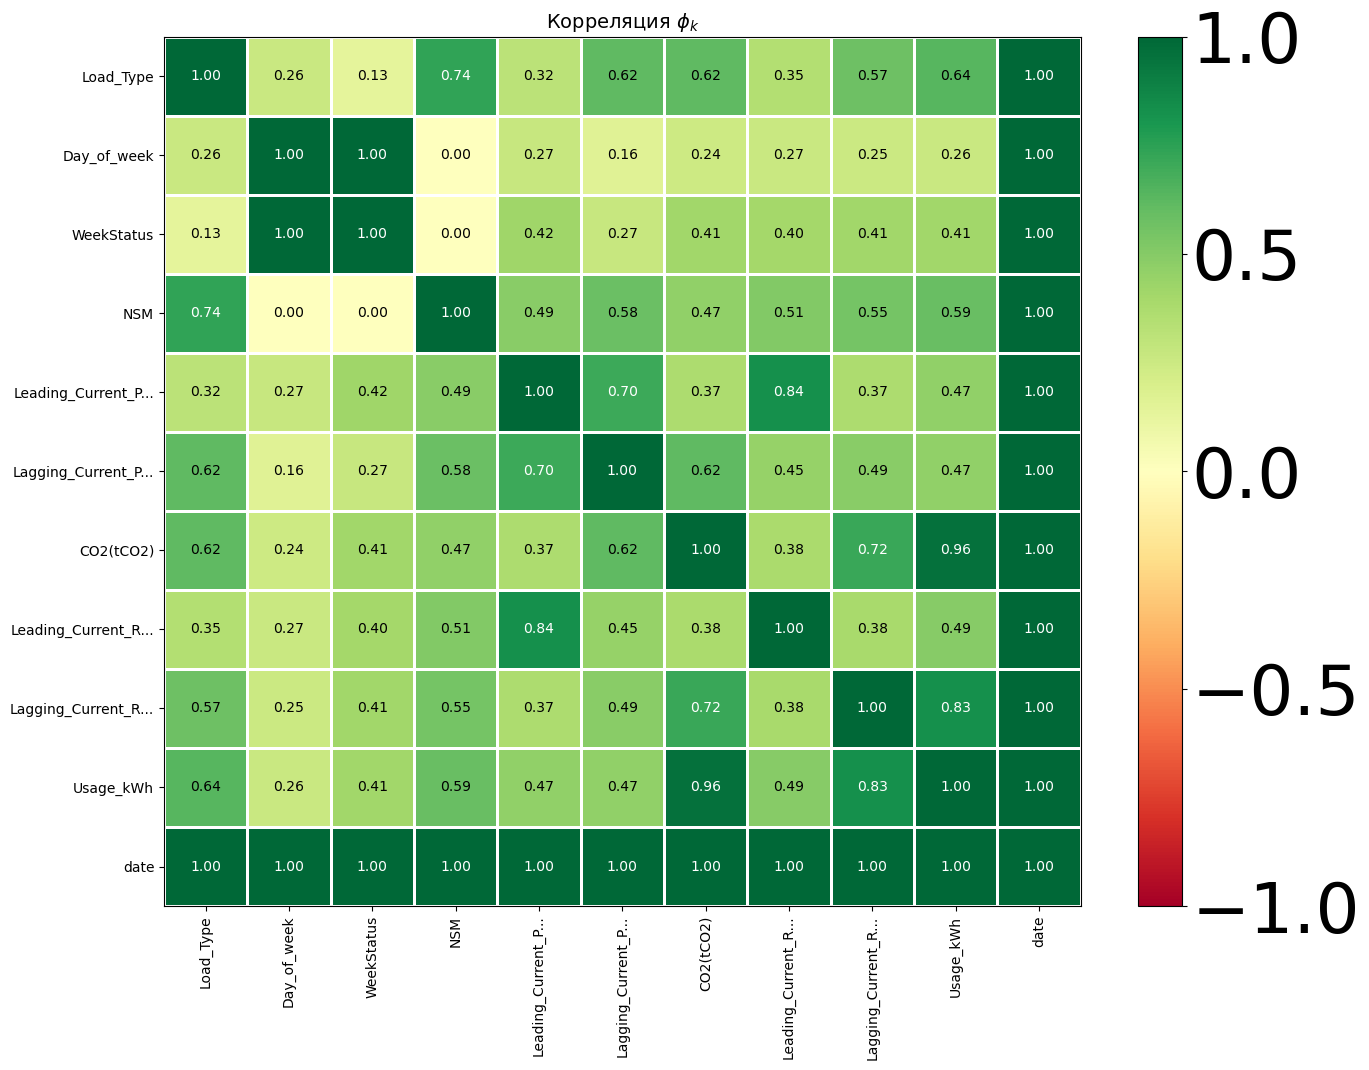

In [47]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(15, 12)
)


 ## Data preparation

In [49]:
# Select a features and target
features = df.drop(['Usage_kWh', 'date'], axis=1)
target = df['Usage_kWh']

# Reform categorial data
features = pd.get_dummies(features, drop_first=True)



# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data Usage_kWh
3.06      488
2.95      488
2.92      480
2.81      461
3.02      458
         ... 
126.68      1
112.57      1
139.39      1
18.36       1
110.23      1
Name: count, Length: 3227, dtype: int64

Test data Usage_kWh
3.06      143
2.88      126
2.95      121
2.92      118
2.99      112
         ... 
32.26       1
87.52       1
120.82      1
69.88       1
7.20        1
Name: count, Length: 1890, dtype: int64


 #### Write the function for metrics

In [62]:
def metrics(predictions, target):
    mae = mean_absolute_error(target, predictions)
    mse = mean_squared_error(target, predictions)
    rmse = np.sqrt(mse)
    r_squared = r2_score(target, predictions)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R_2': r_squared}

 ### Train Linear Regression model

In [65]:
fit_intercepts = [True, False]
best_result = 0
linear_regres, best_fit_intercept = None, None

for fit_intercept in fit_intercepts:
    model = LinearRegression(fit_intercept=fit_intercept)
    
    scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
    result = np.mean(scores)  

    if result > best_result:
        linear_regres = model
        best_result = result
        best_fit_intercept = fit_intercept



# Train model
linear_regres.fit(features_train, target_train)

# Received predictions
predictions = linear_regres.predict(features_test)

lin_reg = metrics(predictions, target_test)


print(f'The best parameters: fit_intercept={best_fit_intercept}')
print(f'Metrics: {lin_reg}')

The best parameters: fit_intercept=True
Metrics: {'MAE': 2.513683640249248, 'MSE': 19.519309794011892, 'RMSE': 4.418066295791847, 'R_2': 0.9819190563983842}


 #### Train DecisionTree Model

In [68]:
min_samples_splits = [2, 5, 10]
best_result = 0
best_params = None
decision_tree_regressor = None

for max_depth in range(1, 16):
    for min_samples_split in min_samples_splits:
        model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
        result = np.mean(scores)  

        if result > best_result:
            decision_tree_regressor = model
            best_result = result
            best_params = (max_depth, min_samples_split)

# Train model
decision_tree_regressor.fit(features_train, target_train)

# Receive predictions
predictions = decision_tree_regressor.predict(features_test)


dec_reg = metrics(predictions, target_test)

print(f'The best parameters: max_depth={best_params[0]}, min_samples_split={best_params[1]}')
print(f'Metrics: {dec_reg}')

The best parameters: max_depth=15, min_samples_split=5
Metrics: {'MAE': 0.6071243758312451, 'MSE': 2.237856639565839, 'RMSE': 1.495946736874625, 'R_2': 0.9979270496695071}


 #### Train Randomforest Model

In [71]:
n_estimators_options = [50, 100, 200]
max_depths = range(1, 16)
best_result = 0
best_params = None
random_forest_regressor = None

for n_estimators in n_estimators_options:
    for max_depth in max_depths:
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
        result = np.mean(scores) 

        if result > best_result:
            random_forest_regressor = model
            best_result = result
            best_params = (n_estimators, max_depth)

# Train model
random_forest_regressor.fit(features_train, target_train)

# Receive predictions
predictions = random_forest_regressor.predict(features_test)

rf_metrics = metrics(predictions, target_test)

print(f'The best parameters: n_estimators={best_params[0]}, max_depth={best_params[1]}')
print(f'Metrics: {rf_metrics}')

The best parameters: n_estimators=200, max_depth=15
Metrics: {'MAE': 0.3910687802463907, 'MSE': 1.230609934452719, 'RMSE': 1.1093285962476218, 'R_2': 0.998860072971061}


 #### Train KNeighborsRegressor model

In [73]:
n_neighbors_options = [3, 5, 7, 10, 15]
weights_options = ['uniform', 'distance']
best_result = 0
best_params = None
knn_regressor = None

for n_neighbors in n_neighbors_options:
    for weights in weights_options:
        model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
        
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
        result = np.mean(scores)  

        if result > best_result:
            knn_regressor = model
            best_result = result
            best_params = (n_neighbors, weights)

# Train model
knn_regressor.fit(features_train, target_train)

# Receive predictions
predictions = knn_regressor.predict(features_test)

knn_metrics = metrics(predictions, target_test)

print(f'The best parameters: n_neighbors={best_params[0]}, weights={best_params[1]}')
print(f'Metrics: {knn_metrics}')

The best parameters: n_neighbors=3, weights=distance
Metrics: {'MAE': 1.3408810316067996, 'MSE': 7.748709296534026, 'RMSE': 2.783650354576527, 'R_2': 0.9928222884285115}


 #### Train LGBMRegressor model

In [75]:
lgbm_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, -1]  # -1 означает отсутствие ограничения
}

best_result_lgbm = 0
best_params_lgbm = None
lgbm_regressor = None

for n_estimators in lgbm_params['n_estimators']:
    for learning_rate in lgbm_params['learning_rate']:
        for max_depth in lgbm_params['max_depth']:
            model = LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
            
            scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
            result = np.mean(scores)

            if result > best_result_lgbm:
                lgbm_regressor = model
                best_result_lgbm = result
                best_params_lgbm = (n_estimators, learning_rate, max_depth)

# Обучение модели
lgbm_regressor.fit(features_train, target_train)

# Получение предсказаний
predictions_lgbm = lgbm_regressor.predict(features_test)

# Вычисление метрик
lgbm_metrics = metrics(predictions_lgbm, target_test)

print(f'LGBM - The best parameters: n_estimators={best_params_lgbm[0]}, learning_rate={best_params_lgbm[1]}, max_depth={best_params_lgbm[2]}')
print(f'LGBM - Metrics: {lgbm_metrics}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 22425, number of used features: 15
[LightGBM] [Info] Start training from score 27.638684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

 #### Train CatBoostRegressor model

In [77]:
catboost_params = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7]
}

best_result_catboost = 0
best_params_catboost = None
catboost_regressor = None

for iterations in catboost_params['iterations']:
    for learning_rate in catboost_params['learning_rate']:
        for depth in catboost_params['depth']:
            model = CatBoostRegressor(iterations=iterations, learning_rate=learning_rate, depth=depth, verbose=0)
            
            scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
            result = np.mean(scores)

            if result > best_result_catboost:
                catboost_regressor = model
                best_result_catboost = result
                best_params_catboost = (iterations, learning_rate, depth)

# Обучение модели
catboost_regressor.fit(features_train, target_train)

# Получение предсказаний
predictions_catboost = catboost_regressor.predict(features_test)

# Вычисление метрик
catboost_metrics = metrics(predictions_catboost, target_test)

print(f'CatBoost - The best parameters: iterations={best_params_catboost[0]}, learning_rate={best_params_catboost[1]}, depth={best_params_catboost[2]}')
print(f'CatBoost - Metrics: {catboost_metrics}')

CatBoost - The best parameters: iterations=150, learning_rate=0.2, depth=7
CatBoost - Metrics: {'MAE': 0.701616132511077, 'MSE': 1.644080126354859, 'RMSE': 1.282216879609241, 'R_2': 0.9984770711487821}


 #### Train MLPRegressor model

In [79]:
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 300]
}

best_result_mlp = 0
best_params_mlp = None
mlp_regressor = None

for hidden_layer_sizes in mlp_params['hidden_layer_sizes']:
    for activation in mlp_params['activation']:
        for learning_rate_init in mlp_params['learning_rate_init']:
            for max_iter in mlp_params['max_iter']:
                model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                                     activation=activation,
                                     learning_rate_init=learning_rate_init,
                                     max_iter=max_iter,
                                     random_state=42,
                                     verbose=0)
                
                scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
                result = np.mean(scores)

                if result > best_result_mlp:
                    mlp_regressor = model
                    best_result_mlp = result
                    best_params_mlp = (hidden_layer_sizes, activation, learning_rate_init, max_iter)

# Обучение модели
mlp_regressor.fit(features_train, target_train)

# Получение предсказаний
predictions_mlp = mlp_regressor.predict(features_test)

# Вычисление метрик
mlp_metrics = metrics(predictions_mlp, target_test)

print(f'MLP - The best parameters: hidden_layer_sizes={best_params_mlp[0]}, activation={best_params_mlp[1]}, learning_rate_init={best_params_mlp[2]}, max_iter={best_params_mlp[3]}')
print(f'MLP - Metrics: {mlp_metrics}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

MLP - The best parameters: hidden_layer_sizes=(50, 50), activation=tanh, learning_rate_init=0.001, max_iter=200
MLP - Metrics: {'MAE': 0.3652604729093958, 'MSE': 0.7222625902644194, 'RMSE': 0.8498603357401847, 'R_2': 0.9993309605053692}


 #### Train BaggingRegressor model

In [81]:
bagging_params = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

best_result_bagging = 0
best_params_bagging = None
bagging_regressor = None

for n_estimators in bagging_params['n_estimators']:
    for max_samples in bagging_params['max_samples']:
        for max_features in bagging_params['max_features']:
            model = BaggingRegressor(n_estimators=n_estimators, 
                                      max_samples=max_samples, 
                                      max_features=max_features,
                                      random_state=42)  # Установите random_state для воспроизводимости
            
            scores = cross_val_score(model, features_train, target_train, cv=5, scoring='r2')
            result = np.mean(scores)

            if result > best_result_bagging:
                bagging_regressor = model
                best_result_bagging = result
                best_params_bagging = (n_estimators, max_samples, max_features)


bagging_regressor.fit(features_train, target_train)


predictions_bagging = bagging_regressor.predict(features_test)


bagging_metrics = metrics(predictions_bagging, target_test)

print(f'Bagging - The best parameters: n_estimators={best_params_bagging[0]}, max_samples={best_params_bagging[1]}, max_features={best_params_bagging[2]}')
print(f'Bagging - Metrics: {bagging_metrics}')

Bagging - The best parameters: n_estimators=100, max_samples=1.0, max_features=1.0
Bagging - Metrics: {'MAE': 0.3160540097031964, 'MSE': 1.1046000741852176, 'RMSE': 1.0509995595551966, 'R_2': 0.9989767972405555}


 ## Conclusion

In [92]:
# Build a table for total

model_metrics = [lin_reg, dec_reg, rf_metrics, knn_metrics, lgbm_metrics, catboost_metrics, mlp_metrics, bagging_metrics]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNeighborsClassifier', 'LGBM', 'CatBoost', 'MLPRegressor', 'BaggingRegressor'])
print(total.sort_values(by='R_2', ascending=False))

                           MAE        MSE      RMSE       R_2
MLPRegressor          0.365260   0.722263  0.849860  0.999331
BaggingRegressor      0.316054   1.104600  1.051000  0.998977
RandomForest          0.391069   1.230610  1.109329  0.998860
CatBoost              0.701616   1.644080  1.282217  0.998477
LGBM                  0.517880   1.703353  1.305126  0.998422
DecisionTree          0.607124   2.237857  1.495947  0.997927
KNeighborsClassifier  1.340881   7.748709  2.783650  0.992822
LogisticRegression    2.513684  19.519310  4.418066  0.981919


 ### Improving metrics

In [94]:
def objective(trial):
    # Определяем диапазоны для гиперпараметров
    hidden_layers = trial.suggest_int('hidden_layers', 1, 3)  # Количество скрытых слоев
    hidden_units = trial.suggest_int('hidden_units', 5, 100)   # Количество нейронов в каждом слое
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])  # Функция активации
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-5, 1e-1, log=True)  # Начальная скорость обучения
    alpha = trial.suggest_float('alpha', 1e-5, 1e-1, log=True)  # Регуляризация L2

    # Создаем список скрытых слоев с заданным количеством нейронов
    hidden_layer_sizes = tuple([hidden_units] * hidden_layers)

    model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        learning_rate_init=learning_rate_init,
        alpha=alpha,
        random_state=42,
        max_iter=500,  # Максимальное количество итераций
        verbose=0
    )

    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)  # Используем тестовую выборку
    mse = mean_squared_error(target_test, y_pred)

    return mse  # Минимизируем MSE

# Создаем объект исследования Optuna
study = optuna.create_study(direction='minimize')  # Мы минимизируем MSE
study.optimize(objective, n_trials=30)

# Получаем лучшие параметры
best_params = study.best_params
print(best_params)

[I 2024-11-23 19:35:57,099] A new study created in memory with name: no-name-93fa6dff-be95-4094-8c10-d9cfa791e96d
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-11-23 19:37:16,674] Trial 0 finished with value: 1.4407484549881036 and parameters: {'hidden_layers': 3, 'hidden_units': 41, 'activation': 'logistic', 'learning_rate_init': 8.612403003605007e-05, 'alpha': 0.01867486403717795}. Best is trial 0 with value: 1.4407484549881036.
[I 2024-11-23 19:37:19,833] Trial 1 finished with value: 1.1967265275109786 and parameters: {'hidden_layers': 1, 'hidden_units': 87, 'activation': 'relu', 'learning_rate_init': 0.019585517762638536, 'alpha': 0.005890189285817954}. Best is trial 1 with value: 1.1967265275109786.
[I 2024-11-23 19:37:38,175] Trial 2 finished with value: 0.9672276865838828 and parameters:

{'hidden_layers': 3, 'hidden_units': 35, 'activation': 'tanh', 'learning_rate_init': 0.0016888030775474906, 'alpha': 0.014298277889248666}


In [110]:
model = MLPRegressor(
        hidden_layer_sizes=(35, 35, 35),
        activation='tanh',
        learning_rate_init=0.0016888030775474906,
        alpha=0.014298277889248666,
        random_state=42,
        max_iter=500,  
        verbose=0
    )



model.fit(features_train, target_train)

y_pred = model.predict(features_test)

mse = mean_squared_error(target_test, y_pred)

total_metrics = metrics(y_pred, target_test)

print(f"Accuracy of MLPClassifier model with specified parameters: {mse}")
print(f"All metrics: {total_metrics}")

Accuracy of MLPClassifier model with specified parameters: 0.46605527351917647
All metrics: {'MAE': 0.2788198415608711, 'MSE': 0.46605527351917647, 'RMSE': 0.6826824104363437, 'R_2': 0.9995682880591238}
